# Plot observation point

In [1]:
import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

In [2]:
path = []
path.append('.')

files = []
# 1 core
files.append('3D_solute-obs-0.pft')
# 8 cores
#files.append('regional_doublet-obs-1.pft')
filenames = pft.get_full_paths(path,files)

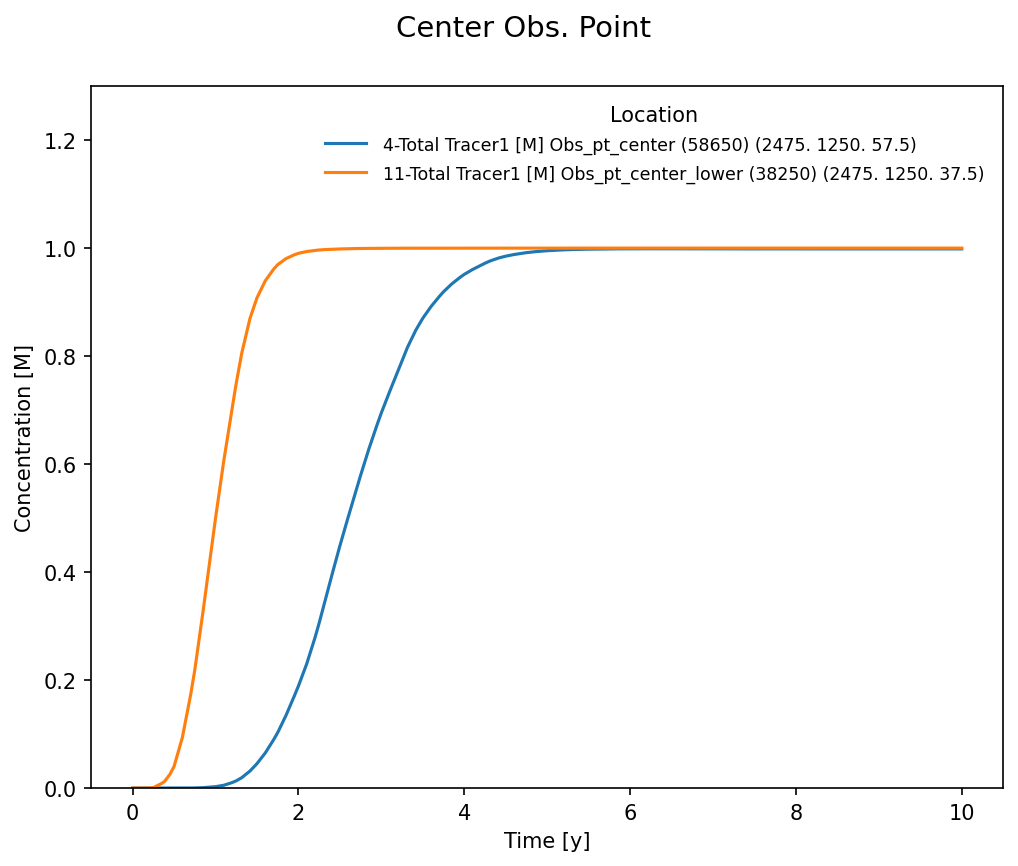

In [3]:
f = plt.figure(figsize=(8,6), dpi=150)
plt.subplot(1,1,1)
f.suptitle("Center Obs. Point",fontsize=14)
plt.xlabel('Time [y]')
plt.ylabel('Concentration [M]')

#plt.xlim(0.,1.)
plt.ylim(0.,1.3)
#plt.grid(True)

icols = [4,11]
for i in range(len(icols)):
  data = pft.Dataset(filenames[0],1,icols[i])
  plt.plot(data.get_array('x'),data.get_array('y'),label=data.get_name('yname'))

plt.legend(loc=1,title='Location')
# xx-small, x-small, small, medium, large, x-large, xx-large, 12, 14
plt.setp(plt.gca().get_legend().get_texts(),fontsize='small')
plt.setp(plt.gca().get_legend().get_texts(),linespacing=0.)
plt.gca().get_legend().get_frame().set_fill(False)
plt.gca().get_legend().draw_frame(False)
#plt.gca().yaxis.get_major_formatter().set_powerlimits((-1,1))

f.subplots_adjust(hspace=0.2,wspace=0.2,
                  bottom=.12,top=.9,
                  left=.14,right=.9)

plt.show()